<!DOCTYPE html>
<html>
<body>
    <h1 style="text-align: center;">
        <strong>⚛️Explicable AI: Superconductivity data</strong>
    </h1>
</body>
</html>

<!DOCTYPE html>
<html>
<body>
    <h3 style="text-align: center;">
     👑 <strong> Feature Selection (Correlation, Univariate, RFE, etc) </strong>
    </h3>
</body>
</html>

<!DOCTYPE html>
<html>
<body>
    <h3>
        <strong>📚Importing Libraries and dataset</strong>
    </h3>
</body>
</html>

In [20]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.api as sm
from scipy.stats import f
from scipy.stats import expon

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFECV 
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("dataset_supercondutividade.csv")
X = df.drop(["critical_temp"], axis=1)
y = df["critical_temp"]
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.9, random_state=1702)

***

<!DOCTYPE html>
<html>
<body>
    <h3>
        <strong>👥Correlation Selection</strong>
    </h3>
</body>
</html>

Consist in the use of the correlation coefficient to determine the useful features for the model construction.

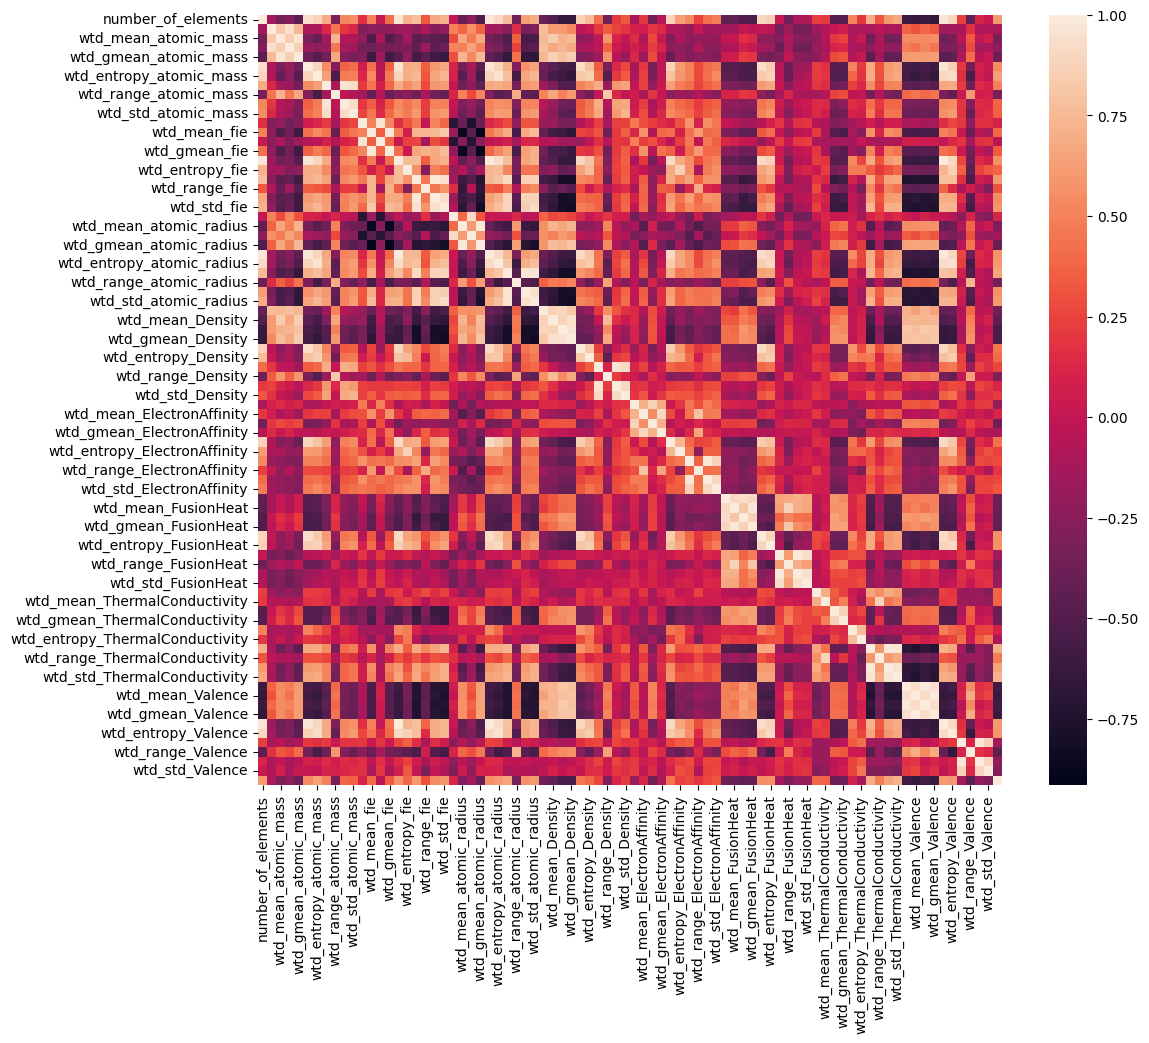

In [4]:
plt.figure(figsize = (12, 10))
sns.heatmap(df.corr());

* It is possible to observe that the features with the highest correlation originate from the same characteristic, as evidenced in the columns related to valence, atomic mass and density.

In [5]:
df.corr()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
number_of_elements,1.000000,-0.141923,-0.353064,-0.292969,-0.454525,0.939304,0.881845,0.682777,-0.320293,0.513998,...,-0.648551,-0.618512,-0.659268,0.967832,0.892559,0.231874,-0.447770,0.105365,0.035216,0.601069
mean_atomic_mass,-0.141923,1.000000,0.815977,0.940298,0.745841,-0.104000,-0.097609,0.125659,0.446225,0.196460,...,0.304683,0.392153,0.321399,-0.156786,-0.145610,-0.107450,0.168633,-0.080279,-0.081253,-0.113523
wtd_mean_atomic_mass,-0.353064,0.815977,1.000000,0.848242,0.964085,-0.308046,-0.412666,-0.144029,0.716623,-0.060739,...,0.545587,0.539780,0.548981,-0.375718,-0.331025,-0.039155,0.330904,-0.003681,0.077323,-0.312272
gmean_atomic_mass,-0.292969,0.940298,0.848242,1.000000,0.856975,-0.190214,-0.232183,-0.175861,0.458473,-0.121708,...,0.427961,0.511508,0.450357,-0.306246,-0.307662,-0.165010,0.272303,-0.124627,-0.117336,-0.230345
wtd_gmean_atomic_mass,-0.454525,0.745841,0.964085,0.856975,1.000000,-0.370561,-0.484664,-0.352093,0.673326,-0.274487,...,0.614100,0.608417,0.623261,-0.477785,-0.448072,-0.078641,0.409674,-0.033313,0.030361,-0.369858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
range_Valence,0.231874,-0.107450,-0.039155,-0.165010,-0.078641,0.203207,0.161350,0.208861,0.023251,0.192347,...,0.111249,-0.041651,0.033007,0.155410,0.204411,1.000000,0.114000,0.973788,0.867393,-0.143546
wtd_range_Valence,-0.447770,0.168633,0.330904,0.272303,0.409674,-0.350047,-0.546910,-0.365395,0.594214,-0.273598,...,0.683700,0.532805,0.681415,-0.417283,-0.639818,0.114000,1.000000,0.184380,0.132162,-0.439901
std_Valence,0.105365,-0.080279,-0.003681,-0.124627,-0.033313,0.087838,0.056309,0.134676,0.066739,0.144106,...,0.186270,0.034589,0.108469,0.034580,0.089774,0.973788,0.184380,1.000000,0.885856,-0.208072
wtd_std_Valence,0.035216,-0.081253,0.077323,-0.117336,0.030361,0.018758,-0.006937,0.102634,0.092819,0.122547,...,0.258593,0.088388,0.168962,-0.017031,0.081284,0.867393,0.132162,0.885856,1.000000,-0.300028


In [6]:
features_correlation = abs(df.corr()["critical_temp"]).nlargest(16).index
features_correlation

Index(['critical_temp', 'wtd_std_ThermalConductivity',
       'range_ThermalConductivity', 'range_atomic_radius',
       'std_ThermalConductivity', 'wtd_mean_Valence',
       'wtd_entropy_atomic_mass', 'wtd_gmean_Valence',
       'wtd_entropy_atomic_radius', 'number_of_elements', 'range_fie',
       'mean_Valence', 'wtd_std_atomic_radius', 'entropy_Valence',
       'wtd_entropy_Valence', 'wtd_std_fie'],
      dtype='object')

In [8]:
X_train_correlation = []
X_test_correlation = []
for column in features_correlation[1:]:
    X_train_correlation.append(X_train[column])
    X_test_correlation.append((X_test[column]))

X_train_correlation = np.array(X_train_correlation).T

In [9]:
model_correlation = sm.OLS(y_train, X_train_correlation)

lr_correlation = model_correlation.fit()

In [10]:
print(f"The R-squared of the model is {lr_correlation.rsquared:.4f}") 

The R-squared of the model is 0.8041


Let´s test with other threshold values!

In [12]:
r_squared_correlation = []
for i in range(10, 61):
    features_correlation = abs(df.corr()["critical_temp"]).nlargest(i).index
    X_train_correlation = []
    X_test_correlation = []

    for column in features_correlation[1:]:
        X_train_correlation.append(X_train[column])
        X_test_correlation.append((X_test[column]))
    X_train_correlation = np.array(X_train_correlation).T

    model_correlation = sm.OLS(y_train, X_train_correlation)
    lr_correlation = model_correlation.fit()
    r_squared_correlation.append(lr_correlation.rsquared)
    #print(f"The R-squared of the model with {i} features is {lr_correlation.rsquared:.4f}") 

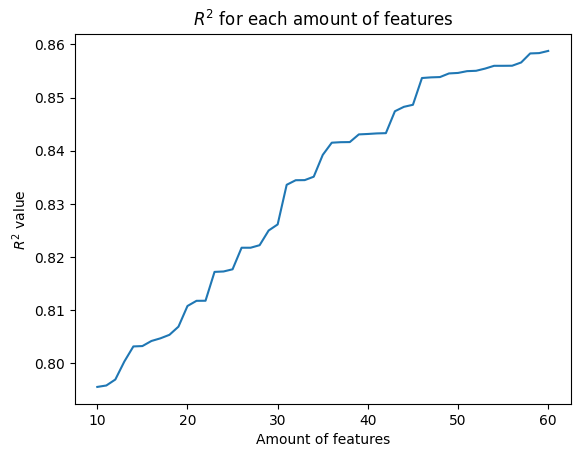

In [13]:
x = range(10, 61)
    
plt.plot(x, r_squared_correlation)
plt.title(f"$R^2$ for each amount of features")
plt.ylabel("$R^2$ value")
plt.xlabel("Amount of features")
plt.show();

* Besides the notable "noise" in the curve, it´s clear that the model performance improve when the amount of features increase.

***

<!DOCTYPE html>
<html>
<body>
    <h3>
        <strong>📊Univariate Selection</strong>
    </h3>
</body>
</html>

Another approach to feature selection involves using statistical tests, such as the F-score, to identify relationships between the output variable and each input variable individually.

In [14]:
feature_selector = SelectKBest(f_regression, k = "all")
fit = feature_selector.fit(X_train,y_train)

summary_stats = pd.DataFrame(
    {"input_variable": X.columns, 
    "p_value": fit.pvalues_, 
    "f_score": fit.scores_,
    }
)

summary_stats.sort_values(by = "p_value", inplace = True)

display(summary_stats)

significance = 0.05 # threshold for p_value (all features passed)
score_threshold = summary_stats["f_score"].mean() # threshold for f-score

selected_variables = summary_stats.loc[(summary_stats["f_score"] >= score_threshold) &
                                       (summary_stats["p_value"] <= significance)]
print(f"The {len(selected_variables['input_variable'])} chosen features were:")
print(list(selected_variables["input_variable"]))


selected_variables = selected_variables["input_variable"].tolist()
X_train_univariate = X_train[selected_variables]

,input_variable,p_value,f_score
0,number_of_elements,0.000000e+00,10712.348929
35,entropy_Density,0.000000e+00,4985.677775
36,wtd_entropy_Density,0.000000e+00,3600.830451
38,wtd_range_Density,0.000000e+00,1655.237322
43,gmean_ElectronAffinity,0.000000e+00,3199.950018
...,...,...,...
21,mean_atomic_radius,3.407058e-50,223.241891
11,mean_fie,8.492825e-46,202.863860
44,wtd_gmean_ElectronAffinity,4.539766e-45,199.492729
65,entropy_ThermalConductivity,1.187118e-29,128.320479


The 28 chosen features were:
['number_of_elements', 'entropy_Density', 'entropy_FusionHeat', 'wtd_entropy_FusionHeat', 'range_ThermalConductivity', 'wtd_range_ThermalConductivity', 'std_ThermalConductivity', 'wtd_std_ThermalConductivity', 'mean_Valence', 'wtd_mean_Valence', 'gmean_Valence', 'wtd_gmean_Valence', 'entropy_Valence', 'wtd_entropy_Valence', 'wtd_gmean_Density', 'gmean_Density', 'std_fie', 'entropy_fie', 'range_atomic_mass', 'wtd_entropy_atomic_mass', 'entropy_atomic_mass', 'wtd_std_fie', 'range_fie', 'wtd_entropy_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius', 'range_atomic_radius', 'entropy_atomic_radius']


In [15]:
model_univariate = sm.OLS(y_train, X_train_univariate)

lr_univariate = model_univariate.fit()

In [16]:
print(f"The R-squared of the model is {lr_univariate.rsquared:.4f}") 

The R-squared of the model is 0.8250


* With less than half of the total features amounts, the result was almost the same!

***

<!DOCTYPE html>
<html>
<body>
    <h3>
        <strong>❌Recursive Feature Eliminatior (RFE)</strong>
    </h3>
</body>
</html>

This method (also called as backward selection) fits a model that initially includes all input variables and then iteratively removes those with the weakest relationship to the output until the desired number of features is reached. It can be combined with cross-validation—which splits the data into different subsets and iteratively trains and validates models on each subset separately—to ensure model robustness. RFE with Cross-validation is already implemented in Python modules, as Scikit-learn. Furthermore, we can apply the inverse approach: starting with a model trained on a single feature and iteratively adding the ones with the highest scores to build the final model.

In [21]:
lr_rfe = LinearRegression()
feature_selector = RFECV(lr_rfe)

fit = feature_selector.fit(X_train,y_train)

optimal_feature_count = feature_selector.n_features_

print(f"Optimal number of features: {optimal_feature_count}")

X_rfe = X_train.loc[:, feature_selector.get_support()]

Optimal number of features: 80


In [22]:
model_rfe = sm.OLS(y_train, X_rfe)

lr_rfe = model_rfe.fit()

In [23]:
print(f"The R-squared of the model is {lr_rfe.rsquared:.4f}") 

The R-squared of the model is 0.8692


* The r squared was the same as that obtained with all features. In other words, we once again had proof that the model's performance improved with the increase in the number of attributes.

In [25]:
feature_ranking= list(feature_selector.ranking_)
print(feature_ranking)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [26]:
feature_ranking.index(2)

38

In [27]:
df.columns[38]

'wtd_range_Density'

* The only feature removed was 'wtd_range_density.'

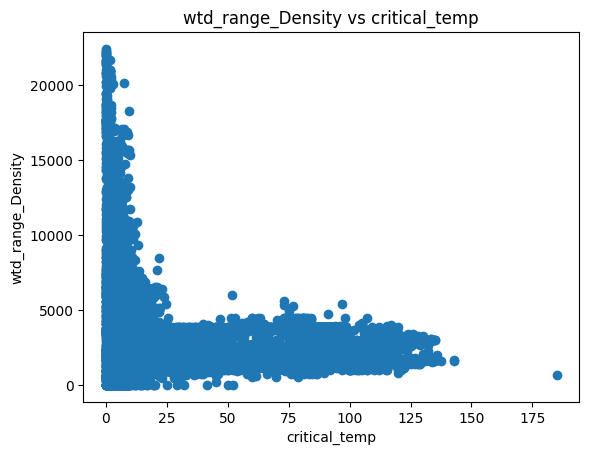

In [29]:
plt.scatter(y_train, X_train["wtd_range_Density"])
plt.ylabel("wtd_range_Density")
plt.xlabel("critical_temp")
plt.title("wtd_range_Density vs critical_temp");

In [30]:
geral_correlation = []
for column in df.columns:
    geral_correlation.append(abs(df.corr()[column]).mean())

In [31]:
np.mean(geral_correlation)

0.3536127607427381

In [32]:
abs(df.corr()["wtd_range_Density"]).mean()

0.3087108160889478

In [33]:
abs(df.corr()["critical_temp"]).nlargest(82).index

Index(['critical_temp', 'wtd_std_ThermalConductivity',
       'range_ThermalConductivity', 'range_atomic_radius',
       'std_ThermalConductivity', 'wtd_mean_Valence',
       'wtd_entropy_atomic_mass', 'wtd_gmean_Valence',
       'wtd_entropy_atomic_radius', 'number_of_elements', 'range_fie',
       'mean_Valence', 'wtd_std_atomic_radius', 'entropy_Valence',
       'wtd_entropy_Valence', 'wtd_std_fie', 'gmean_Valence', 'entropy_fie',
       'wtd_entropy_FusionHeat', 'std_atomic_radius', 'entropy_atomic_radius',
       'entropy_FusionHeat', 'entropy_atomic_mass', 'std_fie', 'gmean_Density',
       'wtd_gmean_Density', 'range_atomic_mass',
       'wtd_range_ThermalConductivity', 'entropy_Density', 'wtd_range_Valence',
       'entropy_ElectronAffinity', 'wtd_mean_Density', 'wtd_gmean_FusionHeat',
       'gmean_FusionHeat', 'wtd_gmean_atomic_radius', 'wtd_entropy_Density',
       'wtd_mean_fie', 'wtd_mean_FusionHeat', 'wtd_entropy_fie',
       'gmean_ThermalConductivity', 'mean_FusionHeat'

* One hypothesis for this outcome relates to its correlation: this column exhibited a low Pearson coefficient with the other features (0.31, considering the absolute values) and with the target variable, beimg one of the least correlated features with the critical temperature.

***

<!DOCTYPE html>
<html>
<body>
    <h3>
        <strong>🕷️Multicolinearity Reduction</strong>
    </h3>
</body>
</html>

Multicollinearity occurs when independent variables in a linear regression equation are correlated [X]. This issue can negatively impact the model by introducing misleading relationships that do not actually exist. To address multicollinearity, various techniques can be applied, one of the most common being the Variance Inflation Factor (VIF). This method involves training a linear model for each feature and evaluating it using the VIF formula:
$$
\mathrm{VIF} = \frac{1}{1- R^2}
$$
If a feature's VIF value exceeds a predefined threshold, it can be removed, as the remaining features can already predict it.

In [48]:
def vif_selection(df_features, vif_threshold):
    
    df = df_features.copy()

    while True:
        VIFs = []

        for col in df.columns:
            X = df.drop(col, axis=1).values
            y = df[col].values

            r_squared = LinearRegression().fit(X, y).score(X, y)

            if r_squared != 1:
                VIF = 1 / (1 - r_squared)
            else:
                VIF = float("inf")

            VIFs.append(VIF)

        VIF_max = max(VIFs)

        if VIF_max > vif_threshold:
            idx = VIFs.index(VIF_max)
            col_remove= df.columns[idx]
            df = df.drop(col_remove, axis=1)

        else:
            break
    return df

In [50]:
X_train_vif = vif_selection(X_train, 10)

In [55]:
len(X_train_vif.columns)

29

In [51]:
model_vif = sm.OLS(y_train, X_train_vif)

lr_vif = model_vif.fit()

In [53]:
print(f"The R-squared of the model is {lr_vif.rsquared:.4f}") 

The R-squared of the model is 0.8284


* The number of features decreased considerably, but the R-squared value did not decrease significantly